In [98]:
import os
import numpy as np
import librosa
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import joblib

In [99]:
# Paths for crying and laughing datasets
crying_path = r'c:\Users\dell\Data Science\TensorFlow Project\Crying'
laughing_path = r'c:\Users\dell\Data Science\TensorFlow Project\laughing'

In [100]:
#Rename and count files in directories
def rename_files_sequentially_and_count(folder_path, prefix):
    files = [f for f in os.listdir(folder_path) if f.endswith('.wav')]
    files.sort()
    count = len(files)
    print(f"Number of '{prefix}' files in '{folder_path}': {count}")
    for i, file in enumerate(files, start=1):
        old_name = os.path.join(folder_path, file)
        new_name = os.path.join(folder_path, f"{prefix}_{i:04d}.wav")
        os.rename(old_name, new_name)
        print(f"Renamed: {old_name} -> {new_name}")
    return count

In [101]:
# Rename and count files
crying_count = rename_files_sequentially_and_count(crying_path, "crying")
laughing_count = rename_files_sequentially_and_count(laughing_path, "laughing")

print(f"Total number of crying files: {crying_count}")
print(f"Total number of laughing files: {laughing_count}")

Number of 'crying' files in 'c:\Users\dell\Data Science\TensorFlow Project\Crying': 2166
Renamed: c:\Users\dell\Data Science\TensorFlow Project\Crying\crying_0001.wav -> c:\Users\dell\Data Science\TensorFlow Project\Crying\crying_0001.wav
Renamed: c:\Users\dell\Data Science\TensorFlow Project\Crying\crying_0002.wav -> c:\Users\dell\Data Science\TensorFlow Project\Crying\crying_0002.wav
Renamed: c:\Users\dell\Data Science\TensorFlow Project\Crying\crying_0003.wav -> c:\Users\dell\Data Science\TensorFlow Project\Crying\crying_0003.wav
Renamed: c:\Users\dell\Data Science\TensorFlow Project\Crying\crying_0004.wav -> c:\Users\dell\Data Science\TensorFlow Project\Crying\crying_0004.wav
Renamed: c:\Users\dell\Data Science\TensorFlow Project\Crying\crying_0005.wav -> c:\Users\dell\Data Science\TensorFlow Project\Crying\crying_0005.wav
Renamed: c:\Users\dell\Data Science\TensorFlow Project\Crying\crying_0006.wav -> c:\Users\dell\Data Science\TensorFlow Project\Crying\crying_0006.wav
Renamed: c:

In [102]:
# Extract MFCC features
def extract_features(file_path):
    y, sr = librosa.load(file_path, sr=None)
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
    mfcc_mean = np.mean(mfcc, axis=1)
    return mfcc_mean

In [103]:
# Process audio data
audio_data = []
labels = []

# Process crying data
for file in os.listdir(crying_path):
    if file.endswith('.wav'):
        file_path = os.path.join(crying_path, file)
        features = extract_features(file_path)
        audio_data.append(features)
        labels.append(0)  # Crying label

# Process laughing data
for file in os.listdir(laughing_path):
    if file.endswith('.wav'):
        file_path = os.path.join(laughing_path, file)
        features = extract_features(file_path)
        audio_data.append(features)
        labels.append(1)  # Laughing label

audio_data = np.array(audio_data)
labels = np.array(labels)

print(f"Audio Data Shape: {audio_data.shape}")
print(f"Labels Shape: {labels.shape}")

Audio Data Shape: (4794, 13)
Labels Shape: (4794,)


In [104]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(audio_data, labels, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

print(f"Training Data Shape: {X_train.shape}")
print(f"Validation Data Shape: {X_val.shape}")
print(f"Test Data Shape: {X_test.shape}")

Training Data Shape: (3068, 13)
Validation Data Shape: (767, 13)
Test Data Shape: (959, 13)


In [105]:
# Train the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
rf_model.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [106]:
# Scale validation and test data
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [107]:
# Validation predictions
y_val_pred = rf_model.predict(X_val_scaled)
print("\nValidation Accuracy:", accuracy_score(y_val, y_val_pred))
print("\nClassification Report for Validation Set:\n", classification_report(y_val, y_val_pred))



Validation Accuracy: 0.9856584093872229

Classification Report for Validation Set:
               precision    recall  f1-score   support

           0       1.00      0.97      0.98       346
           1       0.97      1.00      0.99       421

    accuracy                           0.99       767
   macro avg       0.99      0.98      0.99       767
weighted avg       0.99      0.99      0.99       767



In [108]:
# Test predictions
y_test_pred = rf_model.predict(X_test_scaled)
print("\nTest Accuracy:", accuracy_score(y_test, y_test_pred))
print("\nClassification Report for Test Set:\n", classification_report(y_test, y_test_pred))


Test Accuracy: 0.9822732012513035

Classification Report for Test Set:
               precision    recall  f1-score   support

           0       1.00      0.96      0.98       432
           1       0.97      1.00      0.98       527

    accuracy                           0.98       959
   macro avg       0.98      0.98      0.98       959
weighted avg       0.98      0.98      0.98       959



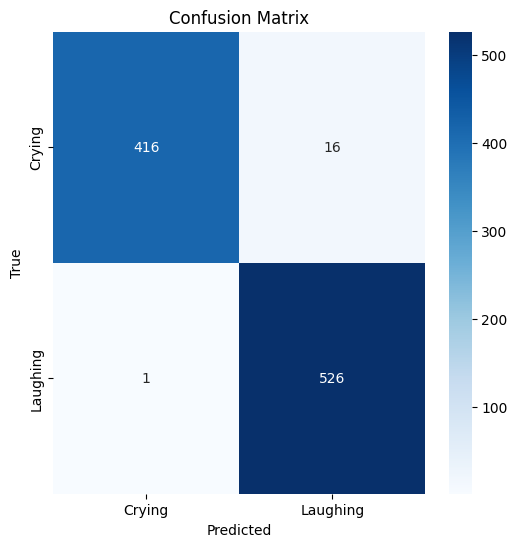

In [109]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Crying', 'Laughing'], yticklabels=['Crying', 'Laughing'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [110]:
# Save model and scaler
directory_path = r'C:\Users\dell\Data Science\TensorFlow Project'
model_path = os.path.join(directory_path, 'random_forest_model.joblib')
scaler_path = os.path.join(directory_path, 'scaler.joblib')

In [111]:
os.makedirs(directory_path, exist_ok=True)
joblib.dump(rf_model, model_path)
joblib.dump(scaler, scaler_path)
print(f"✅ Model saved successfully at {model_path}")
print(f"✅ Scaler saved successfully at {scaler_path}")


✅ Model saved successfully at C:\Users\dell\Data Science\TensorFlow Project\random_forest_model.joblib
✅ Scaler saved successfully at C:\Users\dell\Data Science\TensorFlow Project\scaler.joblib


In [ ]:
# Load the saved model and scaler
rf_model = joblib.load(model_path)
scaler = joblib.load(scaler_path)
print("✅ Model and Scaler loaded successfully!")

# Path for the single audio file
new_data_path = r'c:\Users\dell\Data Science\TensorFlow Project\Data To Test the Model\leila_laughing.wav'

# Process the single audio file
new_audio_data = []
features = extract_features(new_data_path)  # Extract features for the single file
new_audio_data.append(features)

new_audio_data = np.array(new_audio_data)

# Scale new data using the saved scaler
new_audio_scaled = scaler.transform(new_audio_data)

# Predict using the loaded model
new_predictions = rf_model.predict(new_audio_scaled)

# Output predictions
label = "ⵉⵎⵜⴰⵡⵏ" if new_predictions[0] == 0 else "ⵜⴰⷷⵙⵙⴰ"
print(f"File: {os.path.basename(new_data_path)} Predicted as {label}")

✅ Model and Scaler loaded successfully!
File: leila_laughing.wav Predicted as JJHUJ


In [ ]:
# Load the saved model and scaler
rf_model = joblib.load(model_path)
scaler = joblib.load(scaler_path)
print("✅ Model and Scaler loaded successfully!")

# Path for the single audio file
new_data_path = r'C:\Users\dell\Data Science\TensorFlow Project\Data To Test the Model\Crying-Sound-Effect.wav'

# Process the single audio file
new_audio_data = []
features = extract_features(new_data_path)  # Extract features for the single file
new_audio_data.append(features)

new_audio_data = np.array(new_audio_data)

# Scale new data using the saved scaler
new_audio_scaled = scaler.transform(new_audio_data)

# Predict using the loaded model
new_predictions = rf_model.predict(new_audio_scaled)

# Output predictions
label = "ⵉⵎⵜⴰⵡⵏ" if new_predictions[0] == 0 else "ⵜⴰⷷⵙⵙⴰ"
print(f"File: {os.path.basename(new_data_path)} Predicted as {label}")


✅ Model and Scaler loaded successfully!
File: crying_0005.wav Predicted as Crying
